In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 


In [6]:
#upload dataset of Natural Gas Futures Price traded in US
dataset = pd.read_csv("data/NG-Price-2004-2022.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 31, 2022",9.127,9.082,9.284,8.814,86.29K,0.94%
1,"Aug 30, 2022",9.042,9.262,9.300,8.865,76.60K,-3.33%
2,"Aug 29, 2022",9.353,9.670,9.682,9.034,1.20K,0.61%
3,"Aug 26, 2022",9.296,9.372,9.668,9.186,33.98K,-0.84%
4,"Aug 25, 2022",9.375,9.239,9.419,9.175,25.83K,0.81%


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4801 non-null   object 
 1   Price     4801 non-null   float64
 2   Open      4801 non-null   float64
 3   High      4801 non-null   float64
 4   Low       4801 non-null   float64
 5   Vol.      4689 non-null   object 
 6   Change %  4801 non-null   object 
dtypes: float64(4), object(3)
memory usage: 262.7+ KB


In [8]:
#extract the Day, Month and Year
dataset['Date']= pd.to_datetime(dataset['Date'])
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [9]:
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,year,month,day
0,2022-08-31,9.127,9.082,9.284,8.814,86.29K,0.94%,2022,8,31
1,2022-08-30,9.042,9.262,9.300,8.865,76.60K,-3.33%,2022,8,30
2,2022-08-29,9.353,9.670,9.682,9.034,1.20K,0.61%,2022,8,29
3,2022-08-26,9.296,9.372,9.668,9.186,33.98K,-0.84%,2022,8,26
4,2022-08-25,9.375,9.239,9.419,9.175,25.83K,0.81%,2022,8,25


In [10]:
#Dropping columns not needed
dataset.drop(['Date',"Open", "High","Low","Vol.","Change %"], axis=1, inplace=True)

In [11]:
dataset.head()

,Price,year,month,day
0,9.127,2022,8,31
1,9.042,2022,8,30
2,9.353,2022,8,29
3,9.296,2022,8,26
4,9.375,2022,8,25


In [12]:
#Check for null values
dataset.isnull().any()



Price    False
year     False
month    False
day      False
dtype: bool

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')

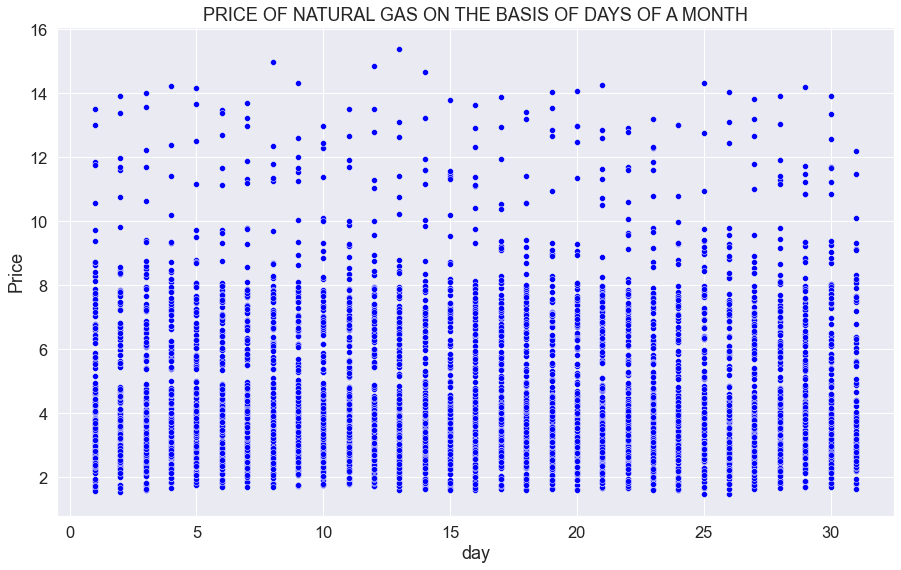

In [13]:
#Let's visualize some data
graph = sns.scatterplot(data=dataset, x="day", y="Price", color='blue')
graph.set_title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')


Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

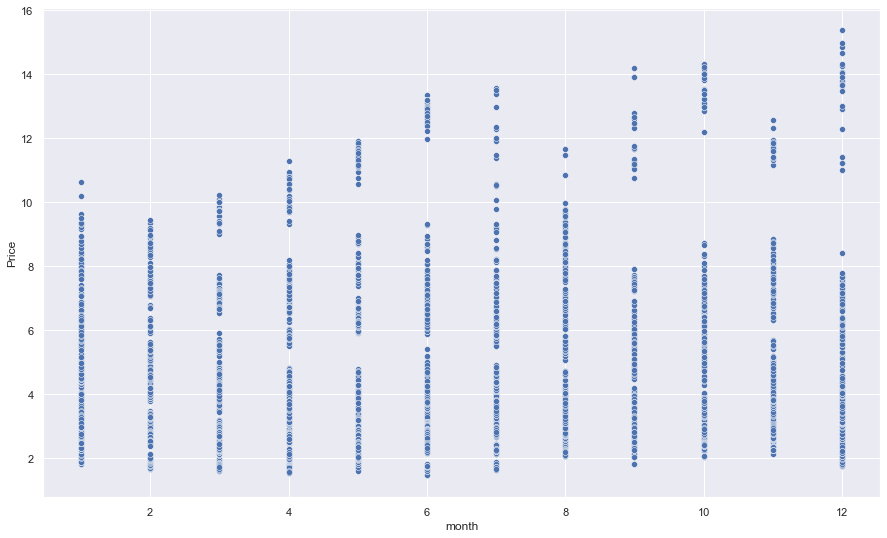

In [14]:


sns.set_theme(style="darkgrid")
graph2 = sns.scatterplot(x="month", y="Price", data=dataset)
graph.set_title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')


<AxesSubplot:xlabel='year', ylabel='Price'>

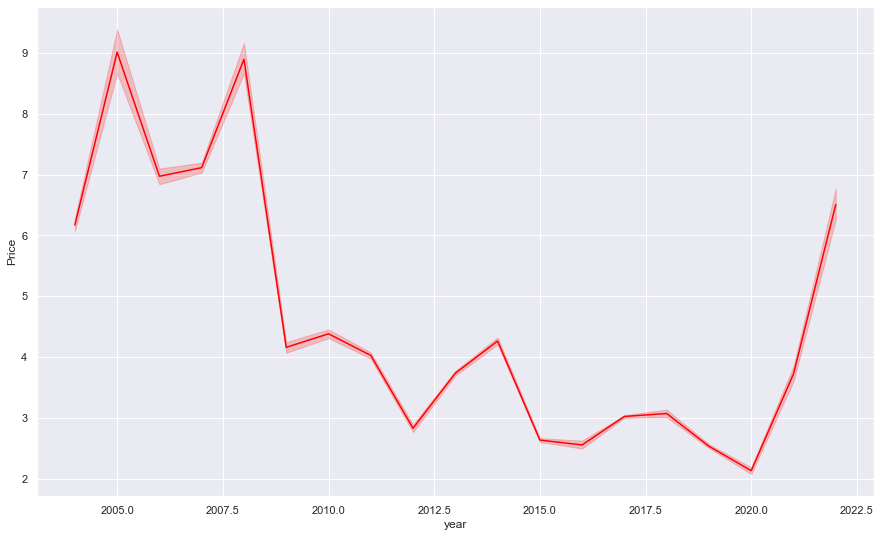

In [15]:
sns.lineplot(x='year',y='Price',data=dataset,color='red')

<AxesSubplot:xlabel='month', ylabel='Price'>

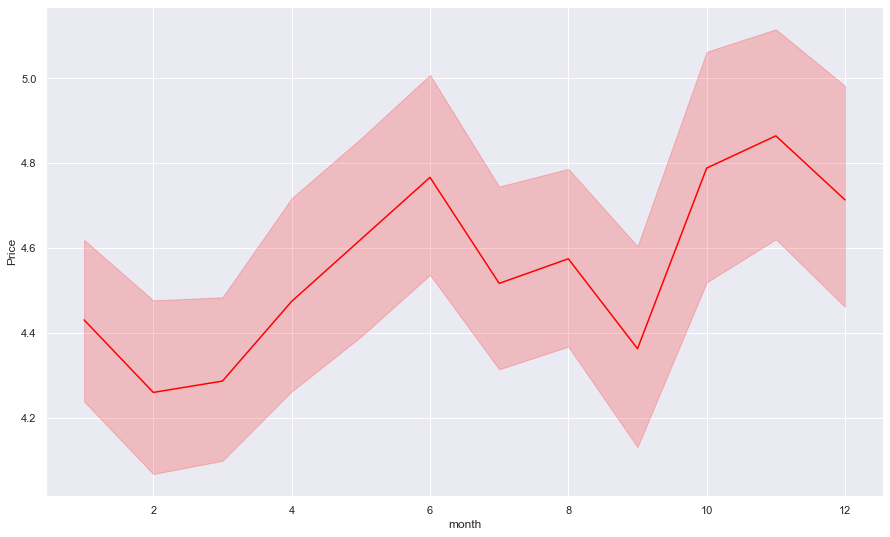

In [16]:
sns.lineplot(x='month',y='Price',data=dataset,color='red')

<AxesSubplot:xlabel='day', ylabel='Price'>

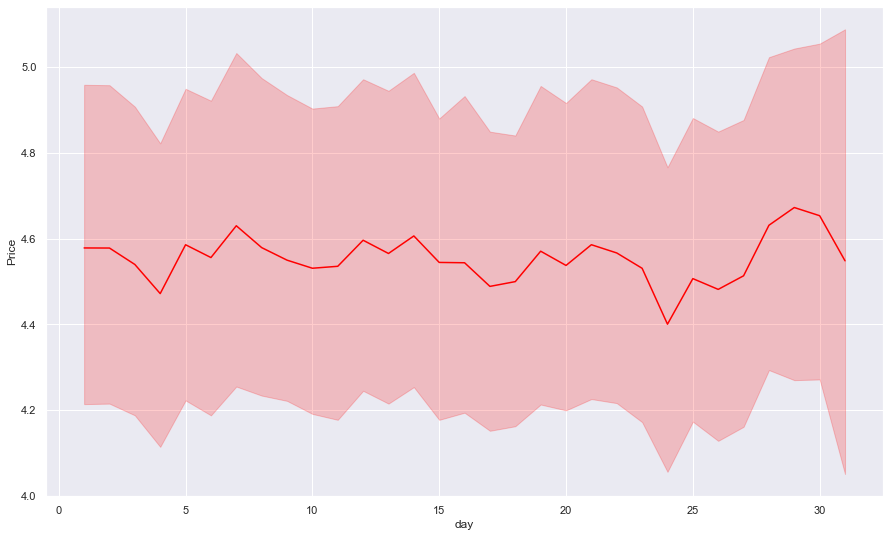

In [17]:
sns.lineplot(x='day',y='Price',data=dataset,color='red')

Text(0.5, 1.0, 'PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

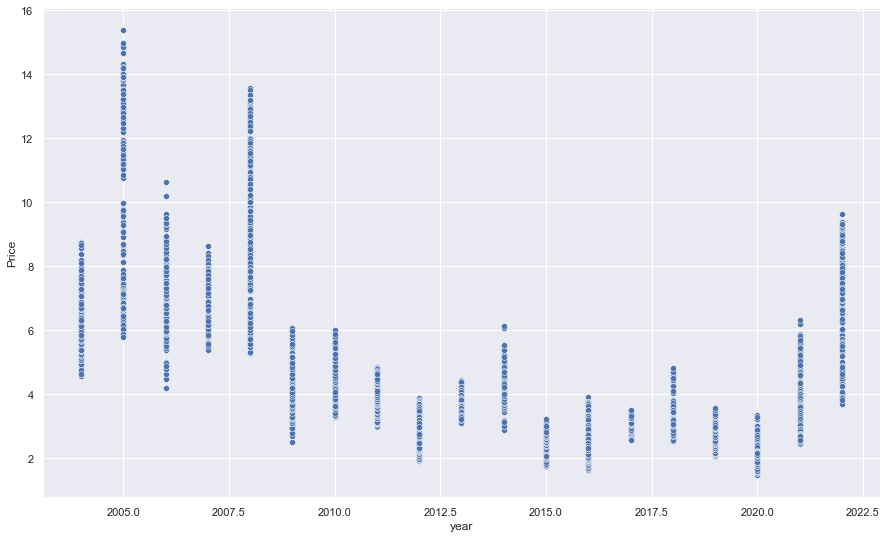

In [18]:
sns.set_theme(style="darkgrid")
graph2 = sns.scatterplot(x="year", y="Price", data=dataset)
graph.set_title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')

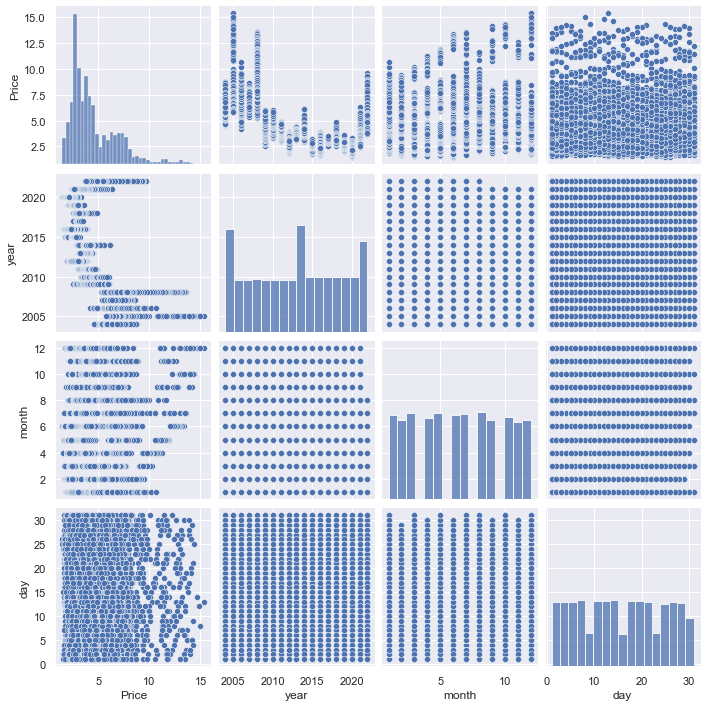

In [19]:
sns.pairplot(dataset)
plt.show()

In [20]:
#Split the dataset into X(independent variable) and Y(dependent variable)
x=dataset.iloc[:,1:4].values #inputs
y=dataset.iloc[:,0:1].values #output price only


In [21]:
x

array([[2022,    8,   31],
       [2022,    8,   30],
       [2022,    8,   29],
       ...,
       [2004,    1,    7],
       [2004,    1,    6],
       [2004,    1,    5]], dtype=int64)

In [22]:
y

array([[9.127],
       [9.042],
       [9.353],
       ...,
       [6.878],
       [7.082],
       [6.827]])

In [23]:
#Split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [24]:
x_train.shape

(3216, 3)

In [25]:
y_train.shape

(3216, 1)

In [26]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred=dtr.predict(x_test)
y_pred

array([5.03 , 1.826, 3.782, ..., 6.981, 3.503, 4.311])

In [28]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.989765771781587

In [32]:
y_p=dtr.predict([[2022,11,22]])
y_p

array([9.647])